### DEMO



In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [2]:
df = pd.read_csv('dataset/filtere_dice_jobs_dataset.csv', low_memory=False)

In [3]:
df.head(1)

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [4]:
df.isna().sum()

advertiserurl                  0
company                        1
employmenttype_jobstatus       5
jobdescription                 0
jobid                          0
joblocation_address            0
jobtitle                       0
postdate                       0
shift                         15
site_name                   1296
skills                         0
uniq_id                        0
dtype: int64

In [5]:
# TEXT DATA PRE-PROCESSING

import re

def cleanResume(Text):
    Text = re.sub('[%s]' % re.escape(",:;/()"), ' ', Text)  # remove punctuations
    Text = Text.lower() # convert to lower case
    return Text


df['skills'] = df['skills'].apply(lambda x:cleanResume(x))

In [6]:
indices = pd.Series(df.index, index=df['skills'])#

In [7]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['skills'])

d = tfidf_matrix.toarray()

In [8]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')
# # Create a list of English stopwords
# stop_words = stopwords.words('english')

# # Instantiate the class
# vec = TfidfVectorizer(
#     stop_words=stop_words, 
#     ngram_range=(2,2), # bigrams
#     use_idf=True
#     )

# # Train the model and transform the data
# tf_idf =  vec.fit_transform(df['skills'])

# # Create a pandas DataFrame
# df1 = pd.DataFrame(
#     tf_idf.toarray(), 
#     columns=vec.get_feature_names(), 
#     index=df
#     )


# idf_df = pd.DataFrame(
#     vec.idf_, 
#     index=vec.get_feature_names(),
#     columns=['idf_weigths']
#     )
    
# idf_df.sort_values(by=['idf_weigths']).head(10)

In [9]:
# cosine similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix) 

cosine_sim.shape


(1563, 1563)

In [11]:
def get_films_by_name(movie_name, movie_indices):
    return movie_indices[movie_indices.index.str.contains(movie_name)]

def get_recommended_movies(movie_index, movie_similarities,movies_df):
    target_movie_index = get_films_by_name(movie_index,indices)
    score = []
    print(target_movie_index)
    print(movie_index)


    
    similarity_scores = pd.DataFrame(movie_similarities[target_movie_index[0]], columns=["score"])

    movie_indices = similarity_scores.sort_values("score", ascending=False)[0:10].index 

    result1 = df['skills'].iloc[movie_indices]
    result2 = similarity_scores.iloc[movie_indices]

    my_dict = {"skills":result1,"scores":result2}

    score.append(result2.index)
    for i in range(1,len(id[0])):
      score.append(id[0][i])

    return my_dict


get_recommended_movies('python',cosine_sim,df) 

skills
algorithms  analysis  apache  case  css  data analysis  data mining  development  hadoop  html  http  java  management  matlab  nosql  programming  project  python  sql  use case      20
data mining  predictive modeling  forecasting  sas  python                                                                                                                              50
big data  bi  business intelligence  software engineer  computer science  hadoop  impala  spark  python  sql  cloud                                                                     65
devops  infrastructure  puppet  chef  systems  engineer  it  software  development  perl  java  python  c  c#  c++  oracle  javascript  google  amazon  aws  google                     82
java  tomcat  apache nginx  php  ruby  sql  mysql  nosql  php  python  json  perl and or ruby                                                                                          105
                                                          

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
cosine_sim[20]

array([0.06335968, 0.07632752, 0.04182962, ..., 0.04349804, 0.        ,
       0.        ])

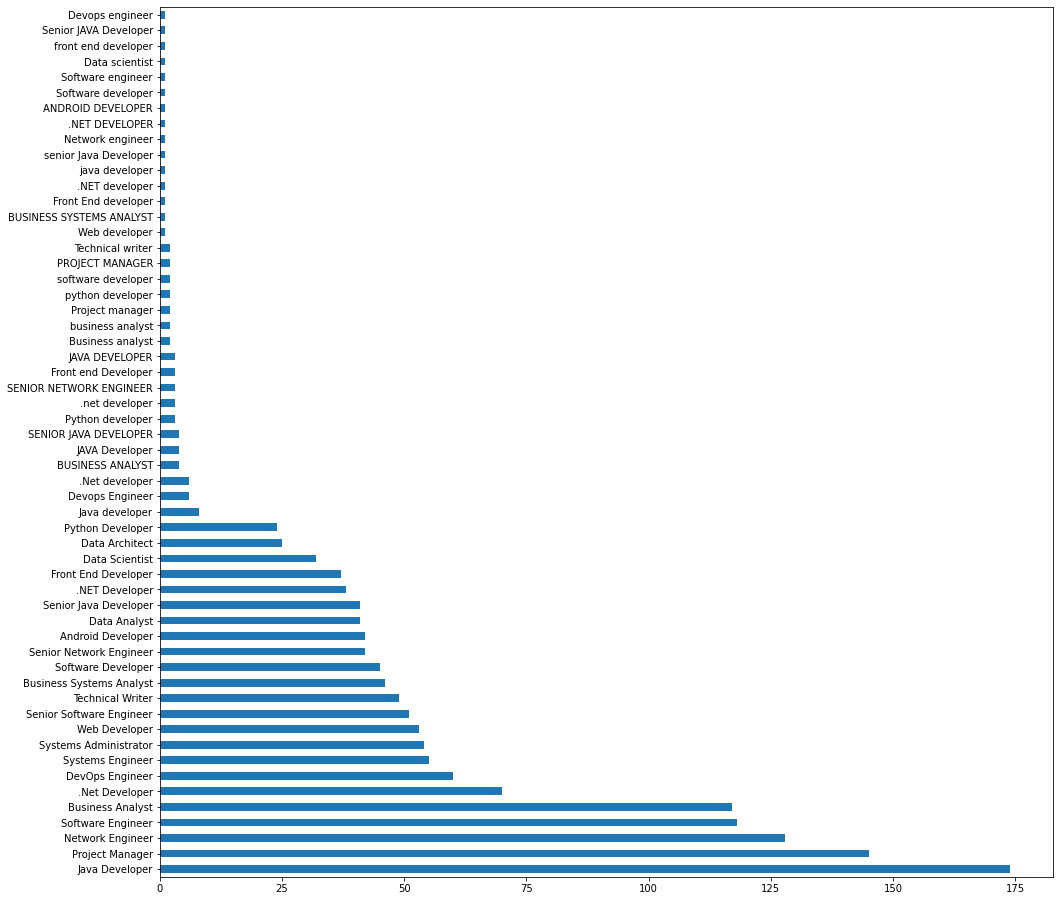

In [ ]:
import matplotlib.pyplot as plt
df.jobtitle.value_counts(dropna=False).plot(kind="barh", figsize=(16,16))
plt.show()

In [ ]:
import tensorflow as tf


import numpy as np

def get_films_by_name(movie_name, movie_indices):
    return movie_indices[movie_indices.index.str.contains(movie_name)]


indices = pd.Series(df.index, index=df['skills'])#


def get_recommended_movies(movie_index,movies_df):

    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df['skills'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix) 

    target_movie_index = get_films_by_name(movie_index,indices)

    # scores = cosine_sim[target_movie_index]

    
    data = []
    for i in range(0, len(target_movie_index)):
      scores = cosine_sim[target_movie_index]
    data.append(scores)
   
    score_list = []
    for i in range (0,len(data[0])):
      score_list.append(data[0][i])

    # sort_data = tf.nn.top_k(score_list, k=10, sorted=True, name=None)
    # array =np.array(sort_data.indices)


    # a = array[0:10]

    # d = np.argmax(a)

    similarity_scores = pd.DataFrame(scores)
    # print(similarity_scores)
    # movie_indices = similarity_scores.sort_values(similarity_scores.columns, ascending=False)[0:11].index 

    movie_indices = similarity_scores[0:10]
    # print(movie_indices)

    sort_data = tf.nn.top_k(movie_indices, k=10, sorted=True, name=None)
    array =np.array(sort_data.indices)
    # print(array)
    return df['skills'].iloc[array[0]], sort_data.iloc[array[0]]

get_recommended_movies('cisco',df)

2022-09-28 14:23:13.913386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-28 14:23:13.913436: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-28 14:23:15.558053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-28 14:23:15.558087: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-28 14:23:15.558107: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sid-ThinkPad-E14-Gen-2): /proc/driver/nvidia/version does not exist
2022-09-28 14:23:15.558406: I tensorflow/core/platform

AttributeError: 'TopKV2' object has no attribute 'iloc'

In [ ]:
def get_recommended_movies(movie_index, movie_similarities,movies_df):
    target_movie_index = indices[movie_index]
    print(target_movie_index)

    similarity_scores = pd.DataFrame(movie_similarities[target_movie_index[1]], columns=["score"])

    movie_indices = similarity_scores.sort_values("score", ascending=False)[0:10].index 

    dict = {}

    result = df['skills'].iloc[movie_indices]

    return df['skills'].iloc[movie_indices], similarity_scores.iloc[movie_indices]

In [ ]:
get_recommended_movies('data science',cosine_sim,df) 

KeyError: ignored

In [ ]:
def get_recommended_movies(movie_index, movie_similarities,movies_df):
    # target_movie_index = indices[movie_index]
    target_movie_index = get_films_by_name(movie_index,indices)

    similarity_scores = pd.DataFrame(movie_similarities[target_movie_index[0]], columns=["score"])
    movie_indices = similarity_scores.sort_values("score", ascending=False)[0:10].index 

    result1 = df['skills'].iloc[movie_indices]
    result2 = similarity_scores.iloc[movie_indices]

    my_dict = {"skills":result1,"scores":result2}

    return my_dict


get_recommended_movies('css',cosine_sim,df) 

{'skills': 6                           html  javascript  css  ajax
 1050                javascript  ajax  jquery  html  css
 384                               javascript  html  css
 941                               html  css  javascript
 1362                              javascript  html  css
 914                               html  css  javascript
 346                         java  javascript  html  css
 340                         java  javascript  html  css
 1029    .net  asp.net  javascript  html  css  sql  ajax
 361                                       html  css  c#
 Name: skills, dtype: object,
 'scores':          score
 6     1.000000
 1050  0.884706
 384   0.800266
 941   0.800266
 1362  0.800266
 914   0.800266
 346   0.742226
 340   0.742226
 1029  0.698774
 361   0.692633}

In [ ]:
import tensorflow as tf
import numpy as np

def get_films_by_name(movie_name, movie_indices):
    return movie_indices[movie_indices.index.str.contains(movie_name)]


indices = pd.Series(df.index, index=df['skills'])#


def get_recommended_movies(movie_index,movies_df):

    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df['skills'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix) 

    target_movie_index = get_films_by_name(movie_index,indices)


    data = []
    for i in range(0, len(target_movie_index)):
      scores = cosine_sim[target_movie_index]
    data.append(scores)
   
    score_list = []
    for i in range (0,len(data[0])):
      score_list.append(data[0][i])


    similarity_scores = pd.DataFrame(scores)

    # movie_indices = similarity_scores[0:10]

    sort_data = tf.nn.top_k(similarity_scores, k=10, sorted=True, name=None)
    print(sort_data)
    array =np.array(sort_data.indices)

    return df['skills'].iloc[array[1]]

get_recommended_movies('agile',df)

TopKV2(values=<tf.Tensor: shape=(109, 10), dtype=float64, numpy=
array([[1.        , 0.58250818, 0.35497864, ..., 0.33110806, 0.31386548,
        0.31047267],
       [1.        , 0.37258242, 0.37094736, ..., 0.21356114, 0.21163886,
        0.20140682],
       [1.        , 0.52757888, 0.37127404, ..., 0.32211511, 0.32211511,
        0.32211511],
       ...,
       [1.        , 0.35899284, 0.34273281, ..., 0.24602745, 0.23996708,
        0.23688873],
       [1.        , 0.42015771, 0.35859105, ..., 0.31045102, 0.30670317,
        0.29872656],
       [1.        , 0.48446364, 0.43204283, ..., 0.39521464, 0.38889482,
        0.38889482]])>, indices=<tf.Tensor: shape=(109, 10), dtype=int32, numpy=
array([[  24,  146,  648, ...,  372,  772,  558],
       [  29,  746,  458, ...,  220,  240,  819],
       [  30,  714,  648, ...,  159,  241,  314],
       ...,
       [1482,  378,  343, ...,  250, 1178,  432],
       [1491, 1223,  558, ..., 1188,  832, 1041],
       [1518,  361, 1275, ...,  558, 

29            agile  pmp knowledge health care experience
746                    project management experience  pmp
458                                                   pmp
1546     project manager  pmp  healthcare  kaiser  health
832                       agile  pmp  rally  applications
1106                                 project manager  pmp
1130                                 pmp  project manager
220     strong knowledge of the .net framework  c# pro...
240     web technology programming skills on microsoft...
819                                              pmp  gmp
Name: skills, dtype: object

In [ ]:
df['skills'][146]

'consulting  http  inquire  network engineer  vpn  wan'

### Rough Work


In [ ]:
data = pd.DataFrame(df.skills)

In [ ]:
skillls = [' including .net tuning integration analysis sql writing code extraction systems and c# etc. loading oracle python my transformation database etl tools data query synchronization']

#append list to DataFrame
data.loc[len(data)] = skillls

In [ ]:
data.skills.iloc[-1]

' including .net tuning integration analysis sql writing code extraction systems and c# etc. loading oracle python my transformation database etl tools data query synchronization'

In [ ]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(data.skills)

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix) 
cosine_sim.shape

(1564, 1564)

In [ ]:
indice = pd.Series(data.index, index=data['skills'])

In [ ]:
target_movie_index = get_films_by_name('python sql analysis',indice)

In [ ]:
d = ['python sql analysis']

def skills(data):
  tfidf_matrix = tfidf.fit_transform(data)
  print(tfidf_matrix)
  return tfidf_matrix


In [ ]:
def get_films_by_name(movie_name, movie_indices):
    return movie_indices[movie_indices.index.str.contains(movie_name)]

target_movie_index = get_films_by_name('linux',indice)


similarity_scores = pd.DataFrame(cosine_sim[1563], columns=["score"])
movie_indices = similarity_scores.sort_values("score", ascending=False)[0:10].index 
result1 = data['skills'].iloc[movie_indices]
result2 = similarity_scores.iloc[movie_indices]

my_dict = {"skills":result1,"scores":result2}
my_dict

{'skills': 1563     including .net tuning integration analysis sq...
 258     data extraction  transformation  and data load...
 568     business analysis  systems analysis  requireme...
 433     business analysis  project management  microso...
 129     data analysis  mysql  postgresql  sql  etl  da...
 776                    fixed income  sql  data extraction
 5                                        .net and c#  sql
 1530    go  python  javascript  continuous integration...
 740                                 net and oracle pl sql
 1480                 java and sql and informatica and etl
 Name: skills, dtype: object,
 'scores':          score
 1563  1.000000
 258   0.918790
 568   0.249652
 433   0.208455
 129   0.205758
 776   0.203298
 5     0.197095
 1530  0.196626
 740   0.191480
 1480  0.189224}

In [ ]:
my_dict

{'skills': 1563     including .net tuning integration analysis sq...
 258     data extraction  transformation  and data load...
 568     business analysis  systems analysis  requireme...
 433     business analysis  project management  microso...
 129     data analysis  mysql  postgresql  sql  etl  da...
 776                    fixed income  sql  data extraction
 5                                        .net and c#  sql
 1530    go  python  javascript  continuous integration...
 740                                 net and oracle pl sql
 1480                 java and sql and informatica and etl
 Name: skills, dtype: object,
 'scores':          score
 1563  1.000000
 258   0.918790
 568   0.249652
 433   0.208455
 129   0.205758
 776   0.203298
 5     0.197095
 1530  0.196626
 740   0.191480
 1480  0.189224}

In [ ]:
id = []
id.append(result1.index)

indexx = []
for i in range(1,len(id[0])):
  indexx.append(id[0][i])


In [ ]:
id

[Int64Index([1563, 258, 568, 433, 129, 776, 5, 1530, 740, 1480], dtype='int64')]

In [ ]:
indexx

[258, 568, 433, 129, 776, 5, 1530, 740, 1480]

In [ ]:
job_title = []
for i in range(0,len(indexx)):
  data_cell_2 = df.at[indexx[i], "jobtitle"]                   
  job_title.append(data_cell_2)
  

In [ ]:
job_title

['Data Architect',
 'Business Analyst',
 'Business Analyst',
 'Data Analyst',
 'Business Analyst',
 'Software Developer',
 'DevOps Engineer',
 '.Net Developer',
 'Software Engineer']

In [ ]:
skills = []
for i in range(1,len(indexx)):
  data_cell = df.at[indexx[i], "skills"]                   
  skills.append(data_cell)
  

In [ ]:
num = int(input("Enter a number:"))

ValueError: invalid literal for int() with base 10: ''

### FUNCTION

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [13]:
df = pd.read_csv('dataset/filtere_dice_jobs_dataset.csv', low_memory=False)
df.iloc[0]

advertiserurl               https://www.dice.com/jobs/detail/DevOps-Engine...
company                                                      Matrix Resources
employmenttype_jobstatus                                            Full Time
jobdescription              Midtown based high tech firm has an immediate ...
jobid                                                      Dice Id : matrixga
joblocation_address                                               Atlanta, GA
jobtitle                                                      DevOps Engineer
postdate                                                       48 minutes ago
shift                         Telecommuting not available|Travel not required
site_name                                                                 NaN
skills                      Configuration Management, Developer, Linux, Ma...
uniq_id                                      45efa1f6bc65acc32bbbb953a1ed13b7
Name: 0, dtype: object

In [14]:
df.isna().sum()

advertiserurl                  0
company                        1
employmenttype_jobstatus       5
jobdescription                 0
jobid                          0
joblocation_address            0
jobtitle                       0
postdate                       0
shift                         15
site_name                   1296
skills                         0
uniq_id                        0
dtype: int64

In [15]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('\r\n', ' ', resumeText) # remove blank spaces
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # non ascii values
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = resumeText.lower() # convert to lower case
    return resumeText


df['skills'] = df['skills'].apply(lambda x:cleanResume(x))
df['jobtitle'] = df['jobtitle'].apply(lambda x:cleanResume(x))

In [16]:
lists = ['python sql analysis']

def get_films_by_name(movie_name, movie_indices):
    return movie_indices[movie_indices.index.str.contains(movie_name)]

def skills(skill_data):

      indexx = []
      id = []
      job_title = []
      score = []
      score_list = []
      dataset = pd.DataFrame(df.skills)
      dataset.loc[len(dataset)] = skill_data
      
      
      tfidf = TfidfVectorizer()

      tfidf_matrix = tfidf.fit_transform(dataset.skills)
      indice = pd.Series(dataset.index, index=dataset['skills'])
      cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

      similarity_scores = pd.DataFrame(cosine_sim[len(dataset)-1], columns=["score"]) 
      movie_indices = similarity_scores.sort_values("score", ascending=False)[0:10].index 

      result1 = dataset['skills'].iloc[movie_indices]
      result2 = similarity_scores.iloc[movie_indices]

      
      id.append(result1.index)
      for indx in range(1,len(id[0])):
        indexx.append(id[0][indx])

      score.append(result2.values.tolist())
      for sc in range(1,len(score[0])):
        score_list.append(score[0][sc])


      for i in range(0,len(indexx)):
        data_cell_2 = df.at[indexx[i], "jobtitle"]                   
        job_title.append(data_cell_2)

      outcome = pd.DataFrame({'index':indexx, 'JD':job_title, 'scores':score_list})

      

      print(outcome)


      skill_op = []

      num = int(input("Enter a number:"))   
      data_skill = df.at[num, "skills"]   

      skill_set = data_skill + ' ' + skill_data[0]

      words = skill_set.split(' ')
      skill_full = " ".join(set(words))
      skill_op.append(skill_full)



      skills(skill_op)


In [17]:
df.skills.iloc[586]

'ci cd pipeline chef jenkins nexus jira git agile linux'

In [18]:
df.skills.iloc[1536]

'business analyst data analytics'

In [19]:
df.skills.iloc[437]

'analysis analyst business analyst business requirements development management scrum'

In [20]:
skills(lists)

   index                 JD                 scores
0    254   python developer   [0.6350836596771549]
1    433   business analyst   [0.4866387924502208]
2    751   python developer  [0.46969338195187466]
3    820   business analyst   [0.4606285717562324]
4   1136  software engineer   [0.4606285717562324]
5   1206   business analyst   [0.4588138593586399]
6    523       data analyst   [0.4471235708466563]
7    249     java developer  [0.44143940487035466]
8    568   business analyst  [0.42498189258373514]
   index                JD                 scores
0    523      data analyst    [0.902106392471083]
1   1221      data analyst    [0.686280646533828]
2    460      data analyst   [0.6265416707295306]
3   1464    data scientist   [0.6158869283265125]
4    254  python developer    [0.431513680736554]
5     50    data scientist   [0.4307138063122148]
6   1466      data analyst   [0.4142086485774187]
7    129      data analyst  [0.40674604365226136]
8   1012      data analyst   [0.40426285

ValueError: invalid literal for int() with base 10: ''

### FUNC2

In [63]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

In [64]:
def cleanResume(resumeText):
    resumeText = re.sub('\r\n', ' ', resumeText) # remove blank spaces
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # non ascii values
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = resumeText.lower() # convert to lower case
    return resumeText

def data_loader(df):
  df['skills'] = df['skills'].apply(lambda x:cleanResume(x))
  df['jobtitle'] = df['jobtitle'].apply(lambda x:cleanResume(x))
  return df


In [121]:
def skills(skill_data):
      indexx = []
      id = []
      job_title = []
      score = []
      score_list = []
      dataset = pd.DataFrame(df.skills)
      dataset.loc[len(dataset)] = skill_data
      
      
      tfidf = TfidfVectorizer()

      tfidf_matrix = tfidf.fit_transform(dataset.skills)
      indice = pd.Series(dataset.index, index=dataset['skills'])
      cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

      similarity_scores = pd.DataFrame(cosine_sim[len(dataset)-1], columns=["score"]) 
      movie_indices = similarity_scores.sort_values("score", ascending=False)[0:10].index 

      result1 = dataset['skills'].iloc[movie_indices]
      result2 = similarity_scores.iloc[movie_indices]

      
      id.append(result1.index)
      for indx in range(1,len(id[0])):
        indexx.append(id[0][indx])

      score.append(result2.values.tolist())
      for sc in range(1,len(score[0])):
        score_list.append(score[0][sc])


      for i in range(0,len(indexx)):
        data_cell_2 = df.at[indexx[i], "jobtitle"]                   
        job_title.append(data_cell_2)

      outcome = pd.DataFrame({'Id':indexx, 'JD':job_title, 'Scores':score_list})
      return outcome


In [122]:
def skill_list(df,num):

      data_skill = df.at[num, "skills"]
      words = data_skill.split(' ')
      skill_full = " ".join(set(words))

      return skill_full


In [126]:
def skills_function(df,skill):
      skill_history = []
      flag=0
      num=10000
      while True:
            if num==-1:
                  break
      
            if flag==0:
                  input_skill_jd = skills(skill)
                  skill_history.append(skill)
                  print(input_skill_jd)
                  flag=1
            
            
            num = int(input("Enter a number:")) 
            new_skills = skill_list(df,num) 
            skill_history.append(new_skills)

            skill = skill.split() + new_skills.split(' ')
            skill = " ".join(set(skill))
            skill = " ".join(set(skill.split()))
            output_skills = skills(skill)
            print("--",)
            print("---->",output_skills)


In [128]:
def main():
      #skills = str(input("Enter your Resume Skills:"))
      data = pd.read_csv('dataset/filtere_dice_jobs_dataset.csv', low_memory=False)
      df = data_loader(data)
      skills = "python sql analysis"
      skills_function(df,skills)

main()

     Id                 JD                 Scores
0   254   python developer   [0.6350836596771549]
1   433   business analyst   [0.4866387924502208]
2   751   python developer  [0.46969338195187466]
3   820   business analyst   [0.4606285717562324]
4  1136  software engineer   [0.4606285717562324]
5  1206   business analyst   [0.4588138593586399]
6   523       data analyst   [0.4471235708466563]
7   249     java developer  [0.44143940487035466]
8   568   business analyst  [0.42498189258373514]
---->      Id                  JD                 Scores
0   249      java developer   [0.7634279212494108]
1   254    python developer   [0.5310371369877246]
2  1252   software engineer   [0.4916954021237763]
3   695      java developer  [0.45972727207902325]
4     5  software developer   [0.4527094004444888]
5  1480   software engineer   [0.4433336054603078]
6   646      .net developer  [0.43423028789297424]
7  1148       web developer   [0.4301688891647172]
8   780      java developer  [0.410

### PRACTICE

In [ ]:
list_data(1233)

data lineage gap analysis mapping


,index,JD,scores
0,1233,data analyst,[0.9697002295300488]
1,1261,data analyst,[0.9697002295300488]
2,568,business analyst,[0.45031303826370506]
3,422,data analyst,[0.43865531511525035]
4,147,business analyst,[0.41352844718420956]
5,410,business analyst,[0.36418953003069726]
6,1337,business systems analyst,[0.3190292264931914]
7,523,data analyst,[0.2643294800657574]
8,129,data analyst,[0.25189584837190976]


In [ ]:
list_data(1261)

data lineage gap analysis mapping


,index,JD,scores
0,1233,data analyst,[0.9697002295300488]
1,1261,data analyst,[0.9697002295300488]
2,568,business analyst,[0.45031303826370506]
3,422,data analyst,[0.43865531511525035]
4,147,business analyst,[0.41352844718420956]
5,410,business analyst,[0.36418953003069726]
6,1337,business systems analyst,[0.3190292264931914]
7,523,data analyst,[0.2643294800657574]
8,129,data analyst,[0.25189584837190976]


In [ ]:
list_data(422)

 mining data mapping sql


,index,JD,scores
0,422,data analyst,[0.9572967245070433]
1,1012,data analyst,[0.5029931130207843]
2,1261,data analyst,[0.46156103182856517]
3,1233,data analyst,[0.46156103182856517]
4,568,business analyst,[0.4331243296986616]
5,1337,business systems analyst,[0.41495509364693894]
6,474,data architect,[0.36349439261416777]
7,200,data scientist,[0.33865054729863886]
8,58,data architect,[0.32978002131101913]
